In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataprep.eda import create_report
import seaborn as sns

In [854]:
df = pd.read_csv('./Fish.csv')

In [855]:
#report = create_report(df, title = 'Fish report')

In [856]:
#report.show_browser()

In [857]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

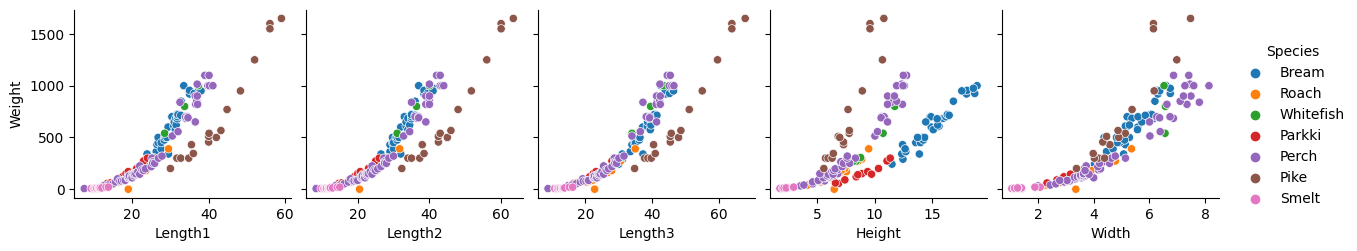

In [858]:

sns.pairplot(data= df,
             x_vars = ['Length1','Length2','Length3','Height','Width'],
             y_vars = 'Weight', 
             hue = 'Species')

In [859]:
df = df.drop(columns = ['Length2', 'Length3'])

In [860]:
df['Species'] = df['Species'].replace(['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],[1,2,3,4,5,6,7])

In [861]:
df['Species']

0      2
1      2
2      2
3      2
4      2
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [862]:
df.describe()

,Species,Weight,Length1,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.716981,398.326415,26.247170,8.970994,4.417486
std,1.804117,357.978317,9.996441,4.286208,1.685804
min,1.000000,0.000000,7.500000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,7.786000,4.248500
75%,4.000000,650.000000,32.700000,12.365900,5.584500
max,7.000000,1650.000000,59.000000,18.957000,8.142000


In [863]:
df.to_csv('clean_fish.csv')

In [864]:
#df.drop([142,143,144], axis=0, inplace=True)

In [865]:
y = df['Weight'].to_numpy()
m = len(y)

In [866]:
x = df.drop(columns=['Weight'])
x.columns


Index(['Species', 'Length1', 'Height', 'Width'], dtype='object')

In [867]:
x = np.c_[np.ones((len(x),1)), x]

In [868]:
teta = np.random.randn(5)

In [869]:
# Funcion para calcular el costo de una regresion lineal multivariable
# 1/2m * sumatoria((y_hat - y)**2)
def Costo(x, y, teta):
    y_hat = x.dot(teta)
    errores = np.subtract(y_hat, y)
    # J = costo de la regresion
    J = np.sum(np.square(errores)) / (2*m)
    return J

In [870]:
def GradienteDescediente(x, y, teta, alfa, epocas):
    historialCostos = np.zeros(epocas)
    
    for i in range(epocas):
        y_hat = x.dot(teta)
        error =np.subtract(y_hat, y)
        delta = (2/m) * x.transpose().dot(error)
        teta = teta - alfa * delta
        historialCostos[i] = Costo(x,y,teta)

    return teta, historialCostos


In [871]:
alfa = .00001
epocas = 100

In [872]:
teta, historialCostos = GradienteDescediente(x, y, teta, alfa, epocas)

In [873]:
teta

array([-0.29366186,  1.17515626, 12.64206994,  4.45064022,  2.58951152])

In [874]:
historialCostos[-1]

26523.042773243556

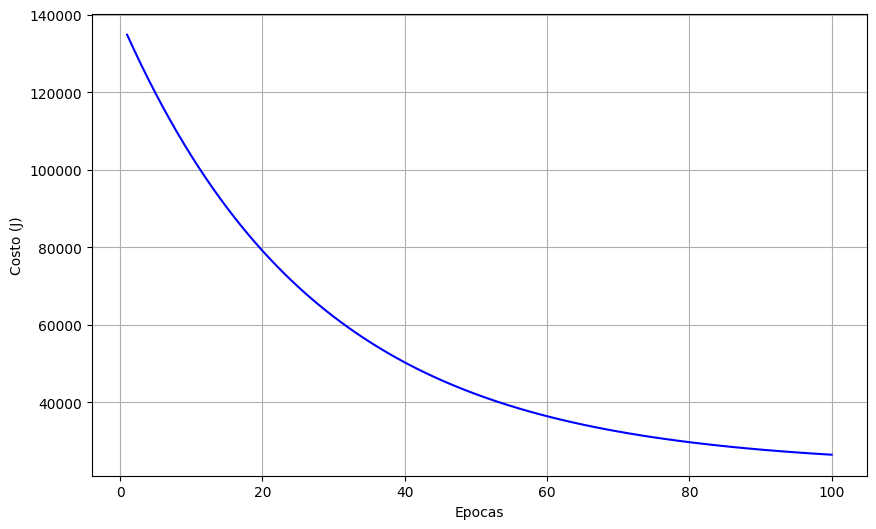

In [875]:
plt.plot(range(1, epocas + 1), historialCostos, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Epocas")
plt.ylabel("Costo (J)")
plt.show()

In [876]:
error = 1
i = 0 
while np.sqrt(np.square(error) > 0.0000001):
    teta, historialCostos = GradienteDescediente(x, y, teta, alfa, epocas)
    y_hat = x.dot(teta)
    error =np.mean(np.subtract(y, y_hat))
    i = i +1
    print(np.sqrt(np.square(error)))
i

48.41312737766691
58.020288532654
59.41461946662392
59.48868620204299
59.35153618964038
59.18161295543348
59.007620127526344
58.8341672953923
58.66198720748797
58.49118884414648
58.32178085769732
58.15375579774421
57.98710366402891
57.821814087643524
57.65787668245195
57.495281102063444
57.33401704940806
57.174074278664044
57.015442595934616
56.85811185970379
56.702071981238824
56.547312924962945
56.39382470880875
56.24159740454855
56.09062113810414
55.94088608983767
55.79238249482315
55.64510064309781
55.49903087989711
55.35416360587045
55.21048927728039
55.06799840618458
54.92668156060179
54.78652936466171
54.647532498739764
54.50968169957655
54.37296776038255
54.237381530929405
54.1029139176269
53.96955588358651
53.83729844867236
53.70613268953973
53.576049739661144
53.44704078933958
53.31909708571304
53.1922099327447
53.06637069120411
52.94157077863779
52.81780166932945
52.695054894249715
52.573322040998015
52.45259475373275
52.332864733095924
52.21412373612484
52.09636357616013
51

87453

In [877]:
historialCostos[-1], teta

(7340.189066206234,
 array([-554.74461256,   10.38545338,   21.49215478,   12.7636917 ,
          55.74280366]))

In [878]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.score(x,y), lin_reg.intercept_, lin_reg.coef_

(0.8847173803467854,
 -554.7493654880126,
 array([ 0.        , 10.385978  , 21.49212628, 12.763642  , 55.74375566]))